In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2023-07-20 19:56:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-20 19:56:33 ERROR 404: Not Found.



In [13]:
# Complete list of stopwords without ellipsis
stopwords = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
    "any", "are", "as", "at", "be", "because", "been", "before", "being", "below",
    "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down",
    "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
    "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in",
    "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my",
    "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
    "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should",
    "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",
    "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're",
    "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very",
    "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when",
    "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's",
    "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
    "yourselves"
]


Epoch 1/30
56/56 [==============================] - 17s 184ms/step - loss: 1.6673 - accuracy: 0.2034 - val_loss: 1.6139 - val_accuracy: 0.2067
Epoch 2/30
56/56 [==============================] - 7s 119ms/step - loss: 1.5933 - accuracy: 0.2837 - val_loss: 1.5688 - val_accuracy: 0.2607
Epoch 3/30
56/56 [==============================] - 4s 63ms/step - loss: 1.4741 - accuracy: 0.3640 - val_loss: 1.3165 - val_accuracy: 0.4157
Epoch 4/30
56/56 [==============================] - 4s 69ms/step - loss: 1.0543 - accuracy: 0.5185 - val_loss: 1.0289 - val_accuracy: 0.4899
Epoch 5/30
56/56 [==============================] - 4s 70ms/step - loss: 0.7771 - accuracy: 0.6573 - val_loss: 0.8411 - val_accuracy: 0.6067
Epoch 6/30
56/56 [==============================] - 3s 59ms/step - loss: 0.6244 - accuracy: 0.7590 - val_loss: 0.7371 - val_accuracy: 0.7348
Epoch 7/30
56/56 [==============================] - 2s 36ms/step - loss: 0.5324 - accuracy: 0.7848 - val_loss: 0.8202 - val_accuracy: 0.6652
Epoch 8/30

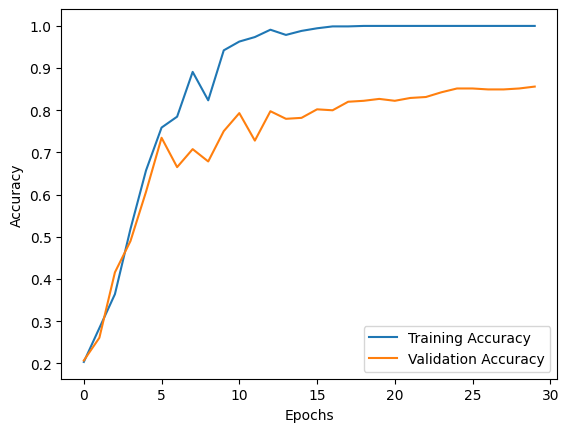

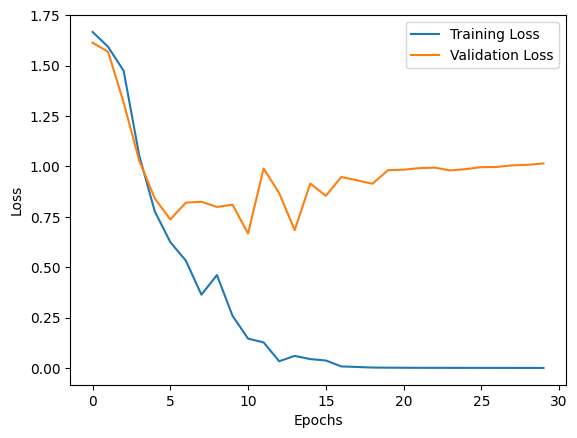

14/14 [==============================] - 0s 5ms/step
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-score: 1.0
Validation Accuracy: 0.8561797752808988
Validation Precision: 0.8698808730757924
Validation Recall: 0.8561797752808988
Validation F1-score: 0.8592505031768843


In [19]:
# Complete list of stopwords without ellipsis
stopwords = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
    "any", "are", "as", "at", "be", "because", "been", "before", "being", "below",
    "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down",
    "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
    "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in",
    "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my",
    "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
    "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should",
    "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",
    "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're",
    "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very",
    "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when",
    "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's",
    "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
    "yourselves"
]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Function to load and preprocess data
def load_and_preprocess_data(file_path, stopwords):
    sentences = []
    labels = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentence = row[1]
            for word in stopwords:
              token = " " + word + " "
              sentence = sentence.replace(token, " ")

            sentences.append(sentence)
    return sentences, labels

# Constants
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = 0.8

# Load and preprocess data
sentences, labels = load_and_preprocess_data("/content/bbc-text.csv", stopwords)

# Split data into training and validation sets
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Tokenize text and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Convert labels to numerical sequences
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

# Define the LSTM-based model
def create_lstm_model(vocab_size, embedding_dim, max_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(len(label_tokenizer.word_index)+1, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the model
model = create_lstm_model(vocab_size, embedding_dim, max_length)
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

# Function to plot training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

# Plot training history
plot_training_history(history)

# Evaluate the model
def evaluate_model(model, padded_sequences, label_sequences):
    predictions = model.predict(padded_sequences)
    predictions = np.argmax(predictions, axis=1)
    true_labels = np.squeeze(label_sequences)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    cm = confusion_matrix(true_labels, predictions)
    return accuracy, precision, recall, f1, cm

# Evaluate the model on training and validation sets
train_accuracy, train_precision, train_recall, train_f1, train_cm = evaluate_model(model, train_padded, training_label_seq)
validation_accuracy, validation_precision, validation_recall, validation_f1, validation_cm = evaluate_model(model, validation_padded, validation_label_seq)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("Validation Accuracy:", validation_accuracy)
print("Validation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation F1-score:", validation_f1)

# Save the model for deployment
model.save('sentiment_analysis_model.h5')

# Generate and download word embeddings for visualization
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]

out_v = open('vecs.tsv', 'w', encoding='utf-8')
out_m = open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


Epoch 1/20
56/56 [==============================] - 15s 221ms/step - loss: 1.7346 - accuracy: 0.2758 - val_loss: 1.4589 - val_accuracy: 0.3978
Epoch 2/20
56/56 [==============================] - 7s 130ms/step - loss: 1.2575 - accuracy: 0.4354 - val_loss: 1.2066 - val_accuracy: 0.4404
Epoch 3/20
56/56 [==============================] - 6s 110ms/step - loss: 1.1084 - accuracy: 0.4697 - val_loss: 1.1445 - val_accuracy: 0.4921
Epoch 4/20
56/56 [==============================] - 4s 65ms/step - loss: 1.0883 - accuracy: 0.5112 - val_loss: 1.1171 - val_accuracy: 0.5730
Epoch 5/20
56/56 [==============================] - 5s 86ms/step - loss: 0.9591 - accuracy: 0.6039 - val_loss: 1.1846 - val_accuracy: 0.5326
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 0.7860 - accuracy: 0.7056 - val_loss: 0.9259 - val_accuracy: 0.7056
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 0.5143 - accuracy: 0.8376 - val_loss: 0.8121 - val_accuracy: 0.7416
Epoch 8/2

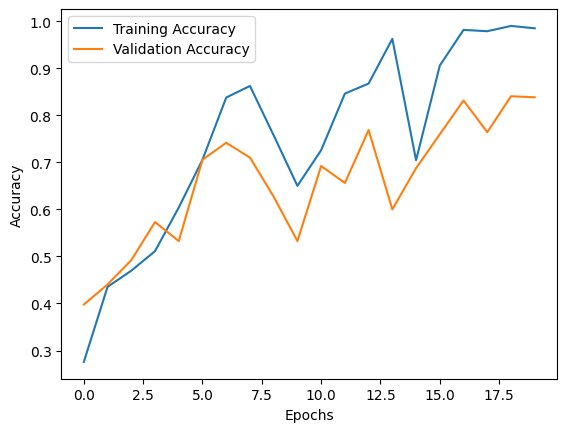

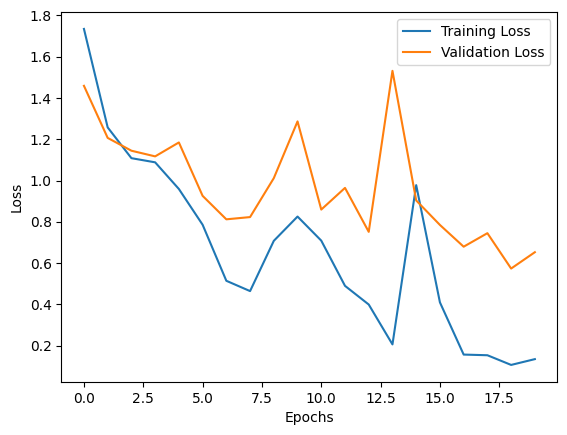

14/14 [==============================] - 0s 3ms/step
Training Accuracy: 0.9938202247191011
Training Precision: 0.9939805490778038
Training Recall: 0.9938202247191011
Training F1-score: 0.9938256066029199
Validation Accuracy: 0.8382022471910112
Validation Precision: 0.8535315632464537
Validation Recall: 0.8382022471910112
Validation F1-score: 0.8373235089249468


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Complete list of stopwords without ellipsis
stopwords = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
    "any", "are", "as", "at", "be", "because", "been", "before", "being", "below",
    "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down",
    "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
    "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in",
    "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my",
    "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
    "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should",
    "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",
    "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're",
    "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very",
    "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when",
    "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's",
    "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
    "yourselves"
]

# Function to load and preprocess data
def load_and_preprocess_data(file_path, stopwords):
    sentences = []
    labels = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentence = row[1]
            for word in stopwords:
                token = " " + word + " "
                sentence = sentence.replace(token, " ")

            sentences.append(sentence)
    return sentences, labels

# Constants
vocab_size = 10000
embedding_dim = 100  # Use GloVe embeddings of dimension 100
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = 0.8

# Load and preprocess data
sentences, labels = load_and_preprocess_data("/content/bbc-text.csv", stopwords)

# Split data into training and validation sets
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Tokenize text and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Convert labels to numerical sequences
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

# Define the LSTM-based model with dropout and L2 regularization
def create_lstm_model(vocab_size, embedding_dim, max_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer to reduce overfitting
        tf.keras.layers.LSTM(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Add L2 regularization to reduce overfitting
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(len(label_tokenizer.word_index)+1, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the model
model = create_lstm_model(vocab_size, embedding_dim, max_length)
num_epochs = 20  # Reduce the number of epochs to avoid overfitting
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq))

# Function to plot training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

# Plot training history
plot_training_history(history)

# Evaluate the model
def evaluate_model(model, padded_sequences, label_sequences):
    predictions = model.predict(padded_sequences)
    predictions = np.argmax(predictions, axis=1)
    true_labels = np.squeeze(label_sequences)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    cm = confusion_matrix(true_labels, predictions)
    return accuracy, precision, recall, f1, cm

# Evaluate the model on training and validation sets
train_accuracy, train_precision, train_recall, train_f1, train_cm = evaluate_model(model, train_padded, training_label_seq)
validation_accuracy, validation_precision, validation_recall, validation_f1, validation_cm = evaluate_model(model, validation_padded, validation_label_seq)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("Validation Accuracy:", validation_accuracy)
print("Validation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation F1-score:", validation_f1)

# Save the model for deployment
model.save('sentiment_analysis_model.h5')

# Generate and download word embeddings for visualization
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]

out_v = open('vecs.tsv', 'w', encoding='utf-8')
out_m = open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()



Epoch 1/50
56/56 [==============================] - 15s 180ms/step - loss: 1.6413 - accuracy: 0.4107 - val_loss: 1.5700 - val_accuracy: 0.3955
Epoch 2/50
56/56 [==============================] - 8s 137ms/step - loss: 0.7543 - accuracy: 0.8067 - val_loss: 1.9379 - val_accuracy: 0.2292
Epoch 3/50
56/56 [==============================] - 4s 75ms/step - loss: 0.3836 - accuracy: 0.9309 - val_loss: 1.5607 - val_accuracy: 0.4360
Epoch 4/50
56/56 [==============================] - 3s 58ms/step - loss: 0.2617 - accuracy: 0.9652 - val_loss: 2.1230 - val_accuracy: 0.3663
Epoch 5/50
56/56 [==============================] - 2s 42ms/step - loss: 0.2029 - accuracy: 0.9798 - val_loss: 2.8039 - val_accuracy: 0.3640
Epoch 6/50
56/56 [==============================] - 4s 66ms/step - loss: 0.1560 - accuracy: 0.9876 - val_loss: 1.2017 - val_accuracy: 0.6539
Epoch 7/50
56/56 [==============================] - 1s 25ms/step - loss: 0.1341 - accuracy: 0.9938 - val_loss: 1.3772 - val_accuracy: 0.6494
Epoch 8/50

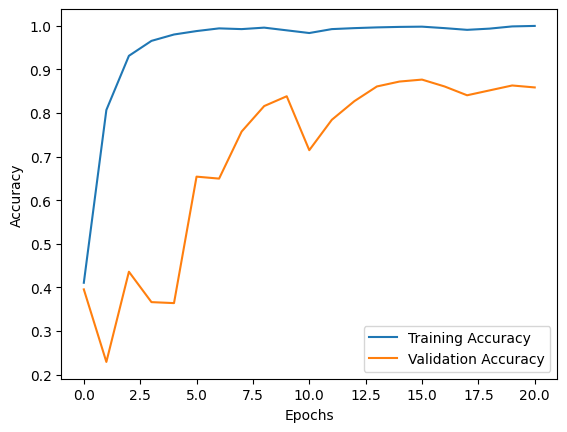

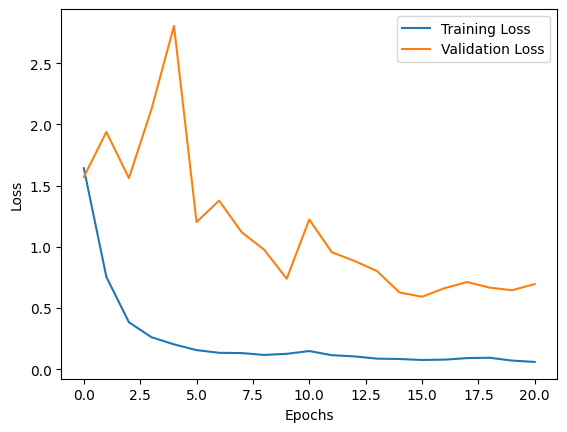

14/14 [==============================] - 0s 5ms/step
Training Accuracy: 0.998314606741573
Training Precision: 0.998326879022581
Training Recall: 0.998314606741573
Training F1-score: 0.9983138843838716
Validation Accuracy: 0.8764044943820225
Validation Precision: 0.8890591267892949
Validation Recall: 0.8764044943820225
Validation F1-score: 0.8780123654377946


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Complete list of stopwords without ellipsis
stopwords = [
    # Complete list of stopwords
]

# Function to load and preprocess data
def load_and_preprocess_data(file_path, stopwords):
    # Load and preprocess data code
    return sentences, labels

# Constants
vocab_size = 10000
embedding_dim = 100  # Use GloVe embeddings of dimension 100
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = 0.8

# Load and preprocess data
sentences, labels = load_and_preprocess_data("/content/bbc-text.csv", stopwords)

# Split data into training and validation sets
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Tokenize text and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Convert labels to numerical sequences
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

# Define the LSTM-based model with dropout, batch normalization, and early stopping
def create_lstm_model(vocab_size, embedding_dim, max_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer to reduce overfitting
        tf.keras.layers.LSTM(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), return_sequences=True),
        tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
        tf.keras.layers.LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(len(label_tokenizer.word_index)+1, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the model with early stopping
model = create_lstm_model(vocab_size, embedding_dim, max_length)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
num_epochs = 50
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=[early_stopping])

# Function to plot training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.show()

# Plot training history
plot_training_history(history)

# Evaluate the model
def evaluate_model(model, padded_sequences, label_sequences):
    predictions = model.predict(padded_sequences)
    predictions = np.argmax(predictions, axis=1)
    true_labels = np.squeeze(label_sequences)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    cm = confusion_matrix(true_labels, predictions)
    return accuracy, precision, recall, f1, cm

# Evaluate the model on training and validation sets
train_accuracy, train_precision, train_recall, train_f1, train_cm = evaluate_model(model, train_padded, training_label_seq)
validation_accuracy, validation_precision, validation_recall, validation_f1, validation_cm = evaluate_model(model, validation_padded, validation_label_seq)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-score:", train_f1)
print("Validation Accuracy:", validation_accuracy)
print("Validation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation F1-score:", validation_f1)

# Save the model for deployment
model.save('sentiment_analysis_model.h5')

# Generate and download word embeddings for visualization
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]

out_v = open('vecs.tsv', 'w', encoding='utf-8')
out_m = open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()
